In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv("E:\\python\\happiness_score_dataset.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.isnull().sum() # this indicates that there are no null values in dataset.

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#char_data=('Country','Region')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [8]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Country                          78.500000
Region                            5.000000
Happiness Rank                   78.500000
Happiness Score                   1.717750
Standard Error                    0.015032
Economy (GDP per Capita)          0.612640
Family                            0.357582
Health (Life Expectancy)          0.371828
Freedom                           0.220762
Trust (Government Corruption)     0.118580
Generosity                        0.159330
Dystopia Residual                 0.703005
dtype: float64


In [10]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

     Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0      False   False           False            False           False   
1      False   False           False            False           False   
2      False   False           False            False           False   
3      False   False           False            False           False   
4      False   False           False            False           False   
..       ...     ...             ...              ...             ...   
153    False   False           False            False           False   
154    False   False           False            False           False   
155    False   False           False            False           False   
156    False   False           False            False           False   
157    False   False           False            False           False   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
0                       False   False          

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,True,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,True,False,False,False,False,False,False,False


Country                             AxesSubplot(0.125,0.125;0.0545775x0.755)
Region                           AxesSubplot(0.190493,0.125;0.0545775x0.755)
Happiness Rank                   AxesSubplot(0.255986,0.125;0.0545775x0.755)
Happiness Score                  AxesSubplot(0.321479,0.125;0.0545775x0.755)
Standard Error                   AxesSubplot(0.386972,0.125;0.0545775x0.755)
Economy (GDP per Capita)         AxesSubplot(0.452465,0.125;0.0545775x0.755)
Family                           AxesSubplot(0.517958,0.125;0.0545775x0.755)
Health (Life Expectancy)         AxesSubplot(0.583451,0.125;0.0545775x0.755)
Freedom                          AxesSubplot(0.648944,0.125;0.0545775x0.755)
Trust (Government Corruption)    AxesSubplot(0.714437,0.125;0.0545775x0.755)
Generosity                        AxesSubplot(0.77993,0.125;0.0545775x0.755)
Dystopia Residual                AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

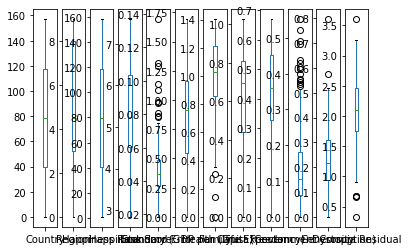

In [11]:
df.plot(kind='box',subplots=True,layout=(1,12))

<AxesSubplot:>

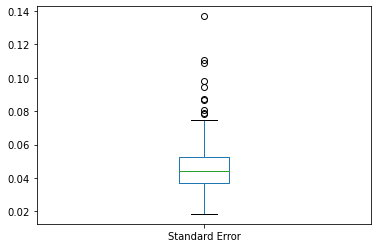

In [12]:
df['Standard Error'].plot(kind='box')

<AxesSubplot:>

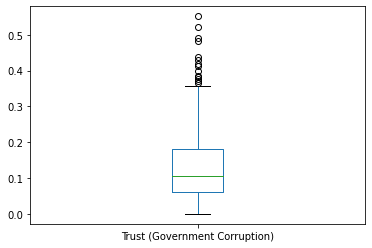

In [13]:
df['Trust (Government Corruption)'].plot(kind='box')

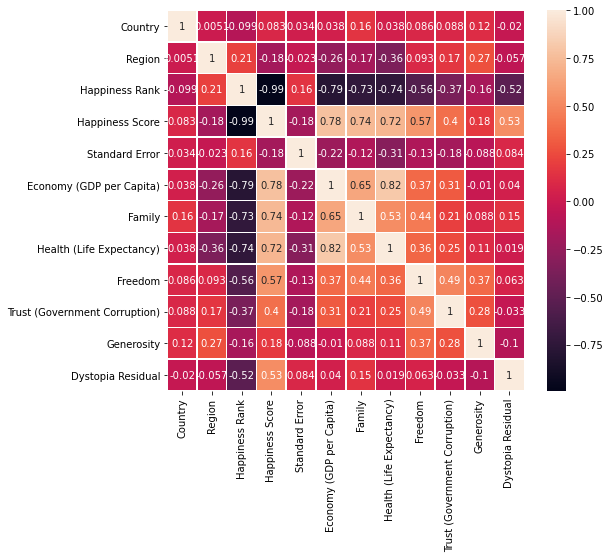

In [14]:
corr= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,linewidths=0.5)
plt.show()

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [16]:
threshold =3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [17]:
df_new=df[(z<3).all(axis=1)]

In [18]:
df.shape

(158, 12)

In [19]:
df_new.shape

(149, 12)

In [20]:
#We can see that there are outliers in 'Standard Error' and 'Trust (Government Corruption)' columns
#Since data set is small (158) entires, deleting records from this dataset is not desirable and hence we are ignoring the outliers.   

In [21]:
print(max(df['Standard Error']))

0.13693


In [22]:
cols=['Region','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
x=df.loc[:,cols]
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
y=df.iloc[:,3]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [24]:
x.shape

(158, 9)

In [25]:
y.shape

(158,)

In [26]:
from sklearn.metrics import r2_score

In [27]:
best_rstate_lr=0
best_r2_score_lr=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred_lr=lr.predict(test_x)
    temp_r2_score_lr=r2_score(pred_lr,test_y)
    if temp_r2_score_lr > best_r2_score_lr:
        best_r2_score_lr = temp_r2_score_lr
        best_rstate_lr=i
        
print("Best_R2_score is:",best_r2_score_lr, "\nBest random state value is:",best_rstate_lr)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_lr)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
lr.fit(train_x,train_y)
predlr=lr.predict(test_x)
print("Predicted values using Linear Regression model:\n",predlr)

print("Random state used is:",best_rstate_lr)
print("R2 score:",r2_score(predlr,test_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predlr))
print("Mean squarred error:", mean_squared_error(test_y,predlr))

Best_R2_score is: 0.9999999667393474 
Best random state value is: 54
Predicted values using Linear Regression model:
 [7.58676019 6.41113568 4.3690845  6.5740218  4.87596849 4.51785048
 6.12276404 4.87432351 3.34001688 5.01306758 6.45466914 4.86722049
 3.65591099 2.90452248 7.42684045 4.51704847 5.98703331 4.63344238
 5.8890068  4.29664666 7.27765781 7.36350749 5.88973146 2.83890749
 3.68081013 7.22564828 4.03307342 6.0027227  5.94809354 3.90372141
 4.30698677 5.7586014 ]
Random state used is: 54
R2 score: 0.9999999667393474
errors:
Absolute squarred error: 0.00019814056847083927
Mean squarred error: 6.073149686362156e-08


In [28]:
print("Predict values are:",predlr)
print("Actual values are:",test_y)

Predict values are: [7.58676019 6.41113568 4.3690845  6.5740218  4.87596849 4.51785048
 6.12276404 4.87432351 3.34001688 5.01306758 6.45466914 4.86722049
 3.65591099 2.90452248 7.42684045 4.51704847 5.98703331 4.63344238
 5.8890068  4.29664666 7.27765781 7.36350749 5.88973146 2.83890749
 3.68081013 7.22564828 4.03307342 6.0027227  5.94809354 3.90372141
 4.30698677 5.7586014 ]
Actual values are: 0      7.587
34     6.411
125    4.369
29     6.574
98     4.876
118    4.518
42     6.123
99     4.874
154    3.340
91     5.013
33     6.455
100    4.867
149    3.656
156    2.905
4      7.427
119    4.517
45     5.987
113    4.633
51     5.889
129    4.297
10     7.278
7      7.364
50     5.890
157    2.839
146    3.681
11     7.226
136    4.033
43     6.003
49     5.948
141    3.904
128    4.307
61     5.759
Name: Happiness Score, dtype: float64


In [29]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [30]:
ls=Lasso(alpha=0.001)
rd=Ridge(alpha=0.001)
enr=ElasticNet(alpha=0.001)
models=(ls,rd,enr)
for i in models:
    i.fit(train_x,train_y)
   # i.score(train_x,train_y)
    print("Score of:",i,"model is:",i.score(train_x,train_y))


Score of: Lasso(alpha=0.001) model is: 0.9998863219155955
Score of: Ridge(alpha=0.001) model is: 0.9999999245466461
Score of: ElasticNet(alpha=0.001) model is: 0.999891112030215


In [31]:
# Regularization score of Lasso, Ridge and ElasticNet indicates that model is not overfit/underfit.

In [32]:
output_data_lr=pd.DataFrame(predlr)
output_data_lr.to_csv("E:\\python\\World_happiness_prediction_linear.csv",header=0)

# now we will save our model for production use
#import joblib
#joblib.dump(lr,'E:\\python\\World_happiness_lr.obj')

In [33]:
best_rstate_lasso=0
best_score_ls=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    ls=Lasso(alpha=0.001)
    ls.fit(train_x,train_y)
    pred_ls=ls.predict(test_x)
    temp_score_ls=ls.score(train_x,train_y)
    if temp_score_ls > best_score_ls:
        best_score_ls = temp_score_ls
        best_rstate_ls=i
        
print("Best_score is:",best_score_ls, "\nBest random state value is:",best_rstate_ls)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_ls)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
ls.fit(train_x,train_y)
predls=ls.predict(test_x)
print("Predicted values using Lasso Regression model:\n",predls)

print("Random state used is:",best_rstate_ls)
print("score:",ls.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predls))
print("Mean squarred error:", mean_squared_error(test_y,predls))

Best_score is: 0.9999255608184188 
Best random state value is: 62
Predicted values using Lasso Regression model:
 [6.57708833 4.27201832 4.4374441  4.51759877 5.19493603 4.71896482
 5.75945725 5.69887931 5.85051355 4.55533198 4.23322996 5.01133064
 5.47837128 5.95716819 6.26937079 4.36727494 4.2081566  4.65810189
 5.28131169 6.5946372  5.87242734 3.57625784 4.29045256 5.81682748
 4.5042432  6.47790049 5.97346037 5.98785506 5.8617239  6.29702008
 5.77108696 6.17160659]
Random state used is: 62
score: 0.9999255608184188
errors:
Absolute squarred error: 0.005013799553251791
Mean squarred error: 4.877149164968495e-05


In [34]:
output_data_ls=pd.DataFrame(predls)
output_data_ls.to_csv("E:\\python\\word_happiness_prediction_lasso.csv",header=0)


print("Predict values are:",predls)
print("Actual values are:",test_y)

Predict values are: [6.57708833 4.27201832 4.4374441  4.51759877 5.19493603 4.71896482
 5.75945725 5.69887931 5.85051355 4.55533198 4.23322996 5.01133064
 5.47837128 5.95716819 6.26937079 4.36727494 4.2081566  4.65810189
 5.28131169 6.5946372  5.87242734 3.57625784 4.29045256 5.81682748
 4.5042432  6.47790049 5.97346037 5.98785506 5.8617239  6.29702008
 5.77108696 6.17160659]
Actual values are: 29     6.574
131    4.271
123    4.436
119    4.517
82     5.192
107    4.715
62     5.754
65     5.695
54     5.848
117    4.550
133    4.218
92     5.007
70     5.477
48     5.960
39     6.269
125    4.369
134    4.194
112    4.642
76     5.286
27     6.611
52     5.878
152    3.575
130    4.292
56     5.828
118    4.518
32     6.477
47     5.975
46     5.984
53     5.855
38     6.295
60     5.770
40     6.168
Name: Happiness Score, dtype: float64


In [35]:
best_rstate_ridge=0
best_score_rd=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    rd=Ridge(alpha=0.001)
    rd.fit(train_x,train_y)
    pred_rd=rd.predict(test_x)
    temp_score_rd=rd.score(train_x,train_y)
    if temp_score_rd > best_score_rd:
        best_score_rd = temp_score_rd
        best_rstate_rd=i
        
print("Best_score is:",best_score_rd, "\nBest random state value is:",best_rstate_rd)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_rd)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
rd.fit(train_x,train_y)
predrd=rd.predict(test_x)
print("Predicted values using ridge Regression model:\n",predrd)

print("Random state used is:",best_rstate_rd)
print("score:",rd.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,predrd))
print("Mean squarred error:", mean_squared_error(test_y,predrd))

Best_score is: 0.9999999496342623 
Best random state value is: 481
Predicted values using ridge Regression model:
 [6.5750582  5.88972182 6.45454936 4.51440166 7.11942599 5.60472119
 4.29246227 3.68099106 5.36029344 4.79975565 5.79068686 5.82420187
 6.50518443 4.86726115 4.83938309 4.55062108 7.28376527 5.33262494
 5.8553145  4.85785691 5.14058544 5.25273147 3.89673308 4.8743061
 4.67749768 7.36339353 6.26921246 4.89754182 5.987129   5.75880976
 4.43563135 5.056935  ]
Random state used is: 481
score: 0.9999999496342623
errors:
Absolute squarred error: 0.000353722887507929
Mean squarred error: 1.633067348667729e-07


In [36]:
output_data_rd=pd.DataFrame(predrd)
output_data_rd.to_csv("E:\\python\\word_happiness_prediction_ridge.csv",header=0)

print("Predict values are:",predrd)
print("Actual values are:",test_y)

Predict values are: [6.5750582  5.88972182 6.45454936 4.51440166 7.11942599 5.60472119
 4.29246227 3.68099106 5.36029344 4.79975565 5.79068686 5.82420187
 6.50518443 4.86726115 4.83938309 4.55062108 7.28376527 5.33262494
 5.8553145  4.85785691 5.14058544 5.25273147 3.89673308 4.8743061
 4.67749768 7.36339353 6.26921246 4.89754182 5.987129   5.75880976
 4.43563135 5.056935  ]
Actual values are: 28     6.575
50     5.890
33     6.455
120    4.514
14     7.119
67     5.605
130    4.292
146    3.681
74     5.360
103    4.800
59     5.791
57     5.824
30     6.505
100    4.867
102    4.839
117    4.550
9      7.284
75     5.332
53     5.855
101    4.857
83     5.140
78     5.253
142    3.896
99     4.874
111    4.677
7      7.364
39     6.269
96     4.898
45     5.987
61     5.759
123    4.436
90     5.057
Name: Happiness Score, dtype: float64


In [37]:
best_rstate_ElasticNet=0
best_score_en=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    en=ElasticNet(alpha=0.001)
    en.fit(train_x,train_y)
    pred_en=en.predict(test_x)
    temp_score_en=en.score(train_x,train_y)
    if temp_score_en > best_score_en:
        best_score_en = temp_score_en
        best_rstate_en=i
        
print("Best_score is:",best_score_en, "\nBest random state value is:",best_rstate_en)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_en)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
en.fit(train_x,train_y)
preden=en.predict(test_x)
print("Predicted values using ElasticNet Regression model:\n",preden)

print("Random state used is:",best_rstate_en)
print("score:",en.score(train_x,train_y))
print("errors:")
print("Absolute squarred error:", mean_absolute_error(test_y,preden))
print("Mean squarred error:", mean_squared_error(test_y,preden))

Best_score is: 0.9999282070992583 
Best random state value is: 62
Predicted values using ElasticNet Regression model:
 [6.57685233 4.27190717 4.43784239 4.51794965 5.19498396 4.71912695
 5.75924674 5.69899085 5.84987568 4.55585734 4.23276    5.01105296
 5.47822828 5.95724481 6.26893737 4.36752001 4.20806367 4.65791897
 5.28113277 6.59485632 5.87223311 3.57645513 4.29052089 5.81689404
 4.50464317 6.47752639 5.97338328 5.98768918 5.8611141  6.29674109
 5.77090372 6.17098581]
Random state used is: 62
score: 0.9999282070992583
errors:
Absolute squarred error: 0.004897080363963469
Mean squarred error: 4.710984358556142e-05


In [38]:
output_data_en=pd.DataFrame(preden)
output_data_en.to_csv("E:\\python\\word_happiness_prediction_elasticnet.csv",header=0)

print("Predict values are:",preden)
print("Actual values are:",test_y)

Predict values are: [6.57685233 4.27190717 4.43784239 4.51794965 5.19498396 4.71912695
 5.75924674 5.69899085 5.84987568 4.55585734 4.23276    5.01105296
 5.47822828 5.95724481 6.26893737 4.36752001 4.20806367 4.65791897
 5.28113277 6.59485632 5.87223311 3.57645513 4.29052089 5.81689404
 4.50464317 6.47752639 5.97338328 5.98768918 5.8611141  6.29674109
 5.77090372 6.17098581]
Actual values are: 29     6.574
131    4.271
123    4.436
119    4.517
82     5.192
107    4.715
62     5.754
65     5.695
54     5.848
117    4.550
133    4.218
92     5.007
70     5.477
48     5.960
39     6.269
125    4.369
134    4.194
112    4.642
76     5.286
27     6.611
52     5.878
152    3.575
130    4.292
56     5.828
118    4.518
32     6.477
47     5.975
46     5.984
53     5.855
38     6.295
60     5.770
40     6.168
Name: Happiness Score, dtype: float64


In [39]:
output_data=pd.DataFrame(test_y)
output_data.to_csv("E:\\python\\word_happiness_prediction_actualdata.csv",header=0)
# We are saving the predicted values of different regession models 
#and also of actual test value in csv file as it becomes easier to compare and check the values in csv files.

In [40]:
algo_list=(lr,ls,rd,en)
for i in algo_list:
    cross_score=cross_val_score(i,x,y,cv=5)
    print("Cross validation score of",i,"is=",cross_score)
    print("Cross validation mean score of",i,"is=",cross_score.mean())
    print("Cross validation standard deviation score of",i,"is=",cross_score.std())
    print("****************************************")

Cross validation score of LinearRegression() is= [0.99999948 0.99999842 0.99999825 0.99999551 0.99999937]
Cross validation mean score of LinearRegression() is= 0.9999982064667714
Cross validation standard deviation score of LinearRegression() is= 1.433825576650553e-06
****************************************
Cross validation score of Lasso(alpha=0.001) is= [0.97323535 0.99893936 0.99829331 0.99590153 0.99793928]
Cross validation mean score of Lasso(alpha=0.001) is= 0.9928617681846399
Cross validation standard deviation score of Lasso(alpha=0.001) is= 0.00986566145456167
****************************************
Cross validation score of Ridge(alpha=0.001) is= [0.99999782 0.99999853 0.99999814 0.99999492 0.99999933]
Cross validation mean score of Ridge(alpha=0.001) is= 0.9999977461833792
Cross validation standard deviation score of Ridge(alpha=0.001) is= 1.503112620589977e-06
****************************************
Cross validation score of ElasticNet(alpha=0.001) is= [0.97508768 0.9989

In [41]:
#After looking at cross validation mean score, mean_absolute_error and r2_score/score of different regression models, I have decided
# to use Linear Regression model in my final object file.
# now we will save our model for production use
import joblib
joblib.dump(lr,'E:\\python\\World_happiness_lr.obj')

['E:\\python\\World_happiness_lr.obj']